# 4- En Küçük Kareler Regresyonu / Partial Least Squares (PLS) - Alıştırmalar

## ALIŞTIRMA - 1

In [1]:
# 2. Alıştırma eklendi.

### Verisetinin İncelenmesi ve Manipüle Edilmesi

In [2]:
# Gerekli kütüphanelerin dahil edilmesi,
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression, PLSSVD

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv"

fuelcons = pd.read_csv(url)
df = fuelcons.copy()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.isnull().values.any() # verisetinde bos degerler var mı?

False

In [4]:
df.info() # verisetinin bilgi cıktısını verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# modelyear veriseti bilgisinde int olarak görünüyor, aslında datetime olması gerekir.
df["MODELYEAR"] = pd.to_datetime(df["MODELYEAR"]) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   MODELYEAR                 1067 non-null   datetime64[ns]
 1   MAKE                      1067 non-null   object        
 2   MODEL                     1067 non-null   object        
 3   VEHICLECLASS              1067 non-null   object        
 4   ENGINESIZE                1067 non-null   float64       
 5   CYLINDERS                 1067 non-null   int64         
 6   TRANSMISSION              1067 non-null   object        
 7   FUELTYPE                  1067 non-null   object        
 8   FUELCONSUMPTION_CITY      1067 non-null   float64       
 9   FUELCONSUMPTION_HWY       1067 non-null   float64       
 10  FUELCONSUMPTION_COMB      1067 non-null   float64       
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64         
 12  CO2EMISSIONS        

In [7]:
df.nunique() # her sütun icin eşsiz degerlerin sayısı

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [8]:
df.describe().T # verisetinin dagılımı hakkında bilgi verir.

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [9]:
df.corr() # verisetinin degiskenleri arasındaki korelasyon durumu

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


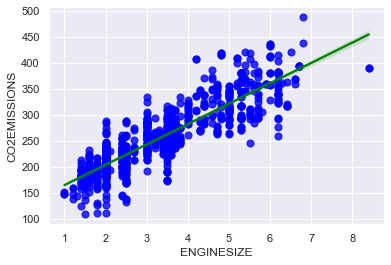

In [10]:
# enginesize ve co2emission görsel durumu
sns.set_theme(color_codes = True)
sns.regplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', color = 'green', scatter_kws = {'s': 50, 'color' : 'blue'});

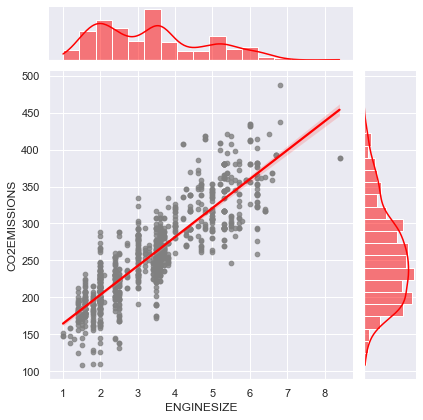

In [11]:
sns.jointplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', kind = 'reg', color = 'red', scatter_kws = {'color': 'gray', 's':22});

### Model Kurulumu

In [12]:
df1 = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']] # sürekli degiskenler
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [13]:
X = df1.drop('CO2EMISSIONS', axis = 1) # bagımsız degiskenler (co2emissions dısındaki degiskenler)
y = df1['CO2EMISSIONS']

# %80 egitim, %20 test seti,
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 20,
                                                   random_state = 42)
# 10 katlı cross validation
cv10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)

RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components = i)
    model = pls.fit(X_train, y_train)
    score = np.sqrt(-1 * model_selection.cross_val_score(pls,
                                                        X_train,
                                                        y_train,
                                                        cv = cv10,
                                                        scoring = 'neg_mean_squared_error').mean())
    RMSE.append(score)

In [14]:
RMSE # hata degerleri

[22.4676423446008,
 21.750654896025498,
 21.318496449240044,
 21.30634291505458,
 21.28182557765404,
 21.300251841083174]

In [15]:
pls

PLSRegression(n_components=6)

In [16]:
model.score(X_train, y_train)

0.890581329862396

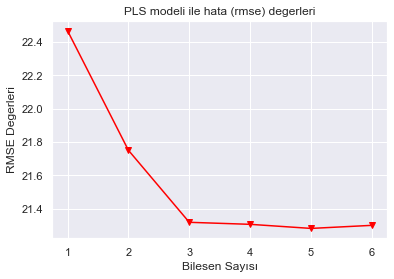

In [17]:
# Degerlerin görsellestirilmesi,
plt.plot(np.arange(1, X_train.shape[1] + 1), RMSE, '-v', c = 'red')
plt.title('PLS modeli ile hata (rmse) degerleri')
plt.xlabel('Bilesen Sayısı')
plt.ylabel('RMSE Degerleri');

In [18]:
min(RMSE) # optimum hata degeri

21.28182557765404

In [19]:
# optimum hata degerindeki bilesen sayısı nedir?
params = {'n_components': np.arange(1, X_train.shape[1] + 1)}
pls = PLSRegression()
plsmodel = GridSearchCV(pls, params, cv = 10)
modelcv = plsmodel.fit(X_train, y_train)

In [20]:
modelcv

GridSearchCV(cv=10, estimator=PLSRegression(),
             param_grid={'n_components': array([1, 2, 3, 4, 5, 6])})

In [21]:
modelcv.best_params_ # optimum hatadaki bilesen sayısı

{'n_components': 5}

In [22]:
bilesen = modelcv.best_params_["n_components"]

In [23]:
bilesen

5

In [24]:
rscore = modelcv.score(X_train, y_train) # modelin basarı degeri

In [25]:
rscore

0.890517535199825

In [26]:
print(f"Modelin basarı yüzdesi: {rscore * 100}")
print("PLS modeli elde edilen optiumum hata degeri: {0} ve Bilesen sayısı: {1}".format(min(RMSE), bilesen))

Modelin basarı yüzdesi: 89.0517535199825
PLS modeli elde edilen optiumum hata degeri: 21.28182557765404 ve Bilesen sayısı: 5


### Sonuç

PLS Regresyon modeli ile elde edilen degerler,
* Modelin basarı yüzdesi: 89.0581329862396
* Optiumum hata degeri:  **21.28182557765404** ve Bilesen sayısı: 5

Bu uygulamada da görüldüğü üzere cross validation uygulandıktan sonra optimum hata degeri elde edildi.

* Aynı veriseti üzerinde,
    * PCR regresyon modelinde optimum hata degeri: **21.51203259544392** olarak bulundu.

## ALIŞTIRMA - 2

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Verisetini buradan [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/data.csv) indirebilirsiniz.

In [3]:
url = 'https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/data.csv'
df = pd.read_csv('https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.info() # veriseti hakkında bilgiler verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [5]:
df.isnull().values.any() # verisetinde bos degerler var mı?

False

In [6]:
df = df.set_index(df.date) # index sütununu date yapma islemi
df = df.drop(['date'], axis = 1)
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
date,,,,,,,,,,
2015-08-14 17:00:11-07:00,37,61211,4,0,0,71.76,0,0,8,17
2015-08-14 17:20:14-07:00,45,62414,4,0,0,71.76,0,0,8,17
2015-08-14 17:30:15-07:00,40,63015,4,0,0,71.76,0,0,8,17
2015-08-14 17:40:16-07:00,44,63616,4,0,0,71.76,0,0,8,17
2015-08-14 17:50:17-07:00,45,64217,4,0,0,71.76,0,0,8,17


In [7]:
df.describe().T # istatistiksel bilgiler

,count,mean,std,min,25%,50%,75%,max
number_people,62184.0,29.072543,22.689026,0.00,9.0,28.00,43.00,145.00
timestamp,62184.0,45799.437958,24211.275891,0.00,26624.0,46522.50,66612.00,86399.00
day_of_week,62184.0,2.982504,1.996825,0.00,1.0,3.00,5.00,6.00
is_weekend,62184.0,0.282870,0.450398,0.00,0.0,0.00,1.00,1.00
is_holiday,62184.0,0.002573,0.050660,0.00,0.0,0.00,0.00,1.00
temperature,62184.0,58.557108,6.316396,38.14,55.0,58.34,62.28,87.17
is_start_of_semester,62184.0,0.078831,0.269476,0.00,0.0,0.00,0.00,1.00
is_during_semester,62184.0,0.660218,0.473639,0.00,0.0,1.00,1.00,1.00
month,62184.0,7.439824,3.445069,1.00,5.0,8.00,10.00,12.00
hour,62184.0,12.236460,6.717631,0.00,7.0,12.00,18.00,23.00


In [8]:
df.corr() # aralarındaki korelasyon degerleri

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


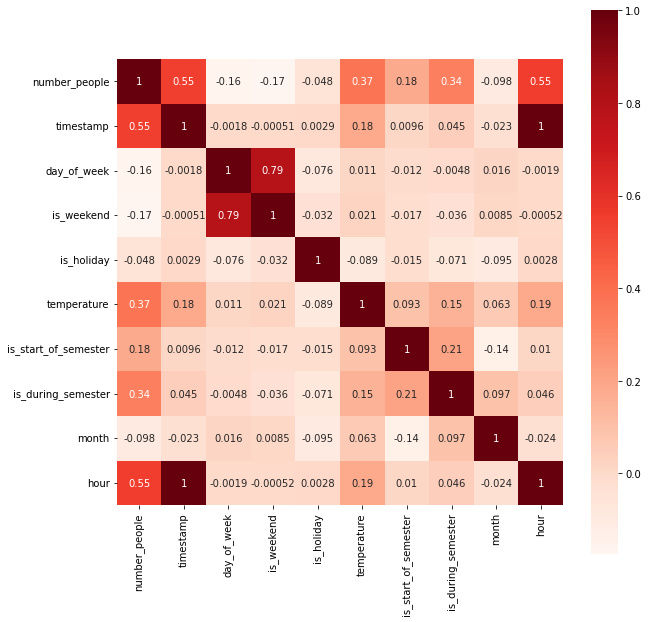

In [9]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), square=True, annot=True, cmap='Reds');

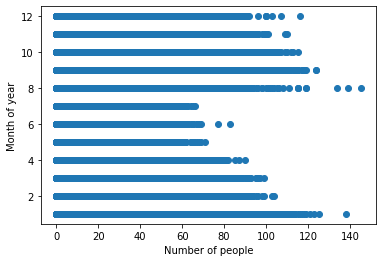

In [10]:
plt.scatter(df['number_people'], df['month'])
plt.xlabel('Number of people')
plt.ylabel('Month of year');

In [11]:
# sıcaklık degerini (fahrenheint) celsiusa dönüstürme islmei
df['temperature'] = df['temperature'].apply(lambda x: (float(5) / 9 * (x - 32)))
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
date,,,,,,,,,,
2015-08-14 17:00:11-07:00,37,61211,4,0,0,22.088889,0,0,8,17
2015-08-14 17:20:14-07:00,45,62414,4,0,0,22.088889,0,0,8,17
2015-08-14 17:30:15-07:00,40,63015,4,0,0,22.088889,0,0,8,17
2015-08-14 17:40:16-07:00,44,63616,4,0,0,22.088889,0,0,8,17
2015-08-14 17:50:17-07:00,45,64217,4,0,0,22.088889,0,0,8,17


In [12]:
df.info() # verisetinin son halinin bilgisi

<class 'pandas.core.frame.DataFrame'>
Index: 62184 entries, 2015-08-14 17:00:11-07:00 to 2017-03-18 19:22:51-07:00
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   timestamp             62184 non-null  int64  
 2   day_of_week           62184 non-null  int64  
 3   is_weekend            62184 non-null  int64  
 4   is_holiday            62184 non-null  int64  
 5   temperature           62184 non-null  float64
 6   is_start_of_semester  62184 non-null  int64  
 7   is_during_semester    62184 non-null  int64  
 8   month                 62184 non-null  int64  
 9   hour                  62184 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 7.2+ MB


### Model Kurulumu

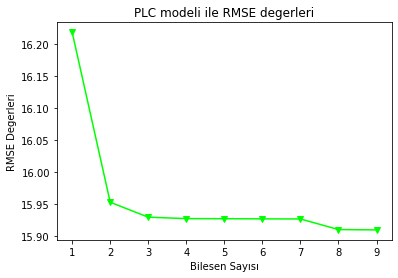

In [13]:
X = df.drop(['number_people'], axis = 1) # bagımsız degiskenler
y = df['number_people'] # bagımlı degisken

# egitim veriseti %80, test veriseti %20,
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.20,
random_state = 42)

# 10 katlı cross validation ile model dogrulama,
cv10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)

RMSE = [] # hesaplanan hata degerleri listesi

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components = i)
    model = pls.fit(X_train, y_train)
    score = np.sqrt(-1 * model_selection.cross_val_score(pls,
                                                        X_train,
                                                        y_train,
                                                        cv = cv10,
                                                        scoring = 'neg_mean_squared_error').mean())
    RMSE.append(score)
    
# Degerlerin Görsellestirilmesi,
plt.plot(np.arange(1, X_train.shape[1] + 1), RMSE, '-v', c = 'lime')
plt.title('PLC modeli ile RMSE degerleri')
plt.xlabel('Bilesen Sayısı')
plt.ylabel('RMSE Degerleri');

In [14]:
min(RMSE)

15.909175946583522

In [15]:
# optimum hata degerindeki bilesen sayısı nedir?
pls_params = {'n_components': np.arange(1, X_train.shape[1] + 1)}
pls = PLSRegression()
plsmodel = GridSearchCV(pls, pls_params, cv = 10)
modelcv = plsmodel.fit(X_train, y_train)

In [16]:
modelcv.best_params_ # optiumum hata degerinde bilesen sayısı

{'n_components': 9}

### Sonuç

In [17]:
print(f"Modelin basarı yüzdesi: {plsmodel.score(X_train, y_train) * 100} \
    Optimum bileşen sayısı: {modelcv.best_params_['n_components']} \
    Minimum hata degeri: {min(RMSE)}")

Modelin basarı yüzdesi: 50.80585617886868     Optimum bileşen sayısı: 9     Minimum hata degeri: 15.909175946583522
